<a href="https://colab.research.google.com/github/Anlu-Chen/Digit_recognizer/blob/main/Digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import tensorflow as tf
print(tf.__version__)
import time as time
import math as math
from tensorflow.keras.callbacks import LearningRateScheduler
import pandas as pd

2.4.1


In [2]:
data = np.loadtxt('/content/drive/MyDrive/mnist clasif_numeros/train.csv',delimiter=',',skiprows=1)
print(data.shape)

(42000, 785)


In [14]:
data_images = data[0:42000, 1:785]
data_number = data[0:42000, 0]
print(data_images.shape, data_number.shape)

numeros = list(range(0,42000))
rand.shuffle(numeros)
#print(numeros)
print(type(numeros))
print(len(numeros)-len(set(numeros)))  #para comprobar si se ha repetido algun numero, si sale 0, no se ha repetido
numeros_random = np.array(numeros) #pasar la lista a vector
#print(numeros_random)

(42000, 784) (42000,)
<class 'list'>
0


(38000, 784) (38000,) (4000, 784) (4000,)


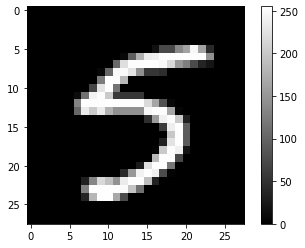

In [13]:
train_data= data_images[numeros_random[0:38000],:]
train_number= data_number[numeros_random[0:38000]]
test_data= data_images[numeros_random[38000:42000],:]
test_number=data_number[numeros_random[38000:42000]]
print(train_data.shape,
      train_number.shape,
      test_data.shape,
      test_number.shape)
example = np.reshape(train_data,(38000,28,28))
plt.imshow(np.asarray(example[12]),cmap='gray')
plt.colorbar()
plt.show()

In [5]:
train_images0 = np.reshape(train_data,(38000,28,28,1))
train_images = train_images0/255.0
test_images0 = np.reshape(test_data,(4000,28,28,1))
test_images = test_images0/255.0

Epoch 1/20

Epoch 00001: LearningRateScheduler reducing learning rate to 0.1.
1900/1900 [==============================] - 14s 7ms/step - loss: 0.4876 - accuracy: 0.8536 - val_loss: 0.2006 - val_accuracy: 0.9383
Epoch 2/20

Epoch 00002: LearningRateScheduler reducing learning rate to 0.09048374180359596.
1900/1900 [==============================] - 12s 6ms/step - loss: 0.1394 - accuracy: 0.9592 - val_loss: 0.0725 - val_accuracy: 0.9795
Epoch 3/20

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0818730753077982.
1900/1900 [==============================] - 12s 6ms/step - loss: 0.1011 - accuracy: 0.9690 - val_loss: 0.1173 - val_accuracy: 0.9660
Epoch 4/20

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0740818220681718.
1900/1900 [==============================] - 12s 6ms/step - loss: 0.0877 - accuracy: 0.9729 - val_loss: 0.0625 - val_accuracy: 0.9815
Epoch 5/20

Epoch 00005: LearningRateScheduler reducing learning rate to 0.06703200460356394.
1900/1900 [=

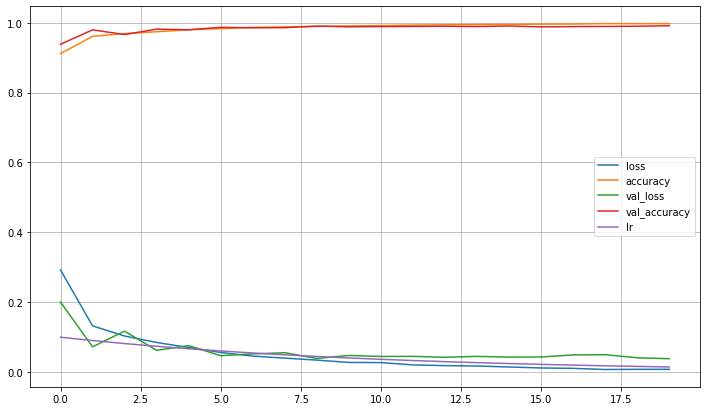

4.137434315681458 
 minutos ha durado


In [9]:

# Entrenamiento de red CNN.
tic=time.time()

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(2,2),input_shape=train_images[0].shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, kernel_size=(2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),  
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, kernel_size=(2,2)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),  
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(2048,kernel_initializer='random_normal',bias_initializer='zeros', use_bias=True), 
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(1024, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(512, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(256, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(128, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(128, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(128, use_bias=True),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('elu'),
        tf.keras.layers.Dense(10, activation='softmax', use_bias=True)])
############################################################################
# Compilamos el modelo
# Definimos como va a ser el ratio de aprendizaje exponencial.

opt=tf.keras.optimizers.SGD(momentum=0.9, nesterov=True, name='SGD')
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']) 

initial_learning_rate = 0.1
def lr_exp_decay(epoch, learning_rate):
    k = 0.1
    return initial_learning_rate * math.exp(-k*epoch)

# Ajustamos el modelo.
training_history = model.fit(
        train_images, 
        train_number, 
        batch_size=20,
        epochs=20, 
        validation_data=(test_images, test_number),
        callbacks=[LearningRateScheduler(lr_exp_decay, verbose=1)]
        )

############################################################################
# Pintamos el modelo
model.summary() 
pd.DataFrame(training_history.history).plot(figsize=(12,7))
plt.grid(True)
plt.show()

toc=time.time()
print((toc-tic)/60,'\n minutos ha durado')